# CANADIAN FEDERAL ELECTION

Canada is a developed country with about 38 million people, and the Parliament of Canada is the federal legislature of Canada. The chosen dataset is the federal election statistics from the year 1867 to 2021which is collected from various sources.
      	There are 31 variables in this dataset which includes the candidates details, party information, occupation, the years they are elected and other important information. Few important studies we need to carry out in this project are,
        <br>
 ( - ) To understand the trends of political diversity of Canadian politics over the time.
 <br>
 ( - ) The role of the province on the candidate and the party.
 <br>
 ( - ) Gender variation affecting the election.
 <br>
 ( - ) Effect of Incumbency on the member.
 <br>
 ( - ) Frequency of candidates running for the same position.
 <br>
 ( - ) Trends of the same party elected several times.
 <br>
After understanding these trends, we can make a model to predict the chance of winning a candidate in the coming elections.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r'D:\Devi\ICT_TVM\Project\federal-candidates-2021-10-20.csv')

In [3]:
pd.set_option('display.max_columns',None)
data.head()

,id,parliament,year,type_elxn,elected,candidate_name,edate,incumbent,gender,birth_year,country_birth,lgbtq2_out,indigenousorigins,occupation,lawyer,censuscategory,riding_id,riding,province,votes,percent_votes,acclaimed,switcher,multiple_candidacy,party_raw,party_minor_group,party_major_group,gov_party_raw,gov_minor_group,gov_major_group,num_candidates
0,26093,1,1867,General,Elected,"POWER,",1867-08-07,Not incumbent,M,1815.0,NaN,NaN,Other,merchant,Other,Sales and service occupations,NaN,HALIFAX,Nova Scotia,2367.0,26.125828,Not acclaimed,Switcher,Single,Anti-Confederate,Third_Party,Third_Party,Conservative,Conservative,Conservative,4
1,13011,1,1867,General,Elected,"JONES,",1867-08-07,Not incumbent,M,1824.0,NaN,NaN,Other,merchant,Other,Sales and service occupations,NaN,HALIFAX,Nova Scotia,2381.0,26.280354,Not acclaimed,Switcher,Single,Labour,Labour,Third_Party,Conservative,Conservative,Conservative,4
2,27974,1,1867,General,Not elected,"SHANNON, S.L.",1867-08-07,Not incumbent,M,NaN,NaN,NaN,Other,lawyer,Lawyer,"Occupations in education, law and social, comm...",NaN,HALIFAX,Nova Scotia,2154.0,23.774834,Not acclaimed,Not switcher,Single,Unknown,Independent,Independent,Conservative,Conservative,Conservative,4
3,18040,1,1867,General,Elected,"KIRKPATRICK, Thomas",1867-08-07,Not incumbent,M,1805.0,NaN,NaN,Other,lawyer,Lawyer,"Occupations in education, law and social, comm...",NaN,FRONTENAC,Ontario,1242.0,64.186043,Not acclaimed,Not switcher,Single,Conservative,Conservative,Conservative,Conservative,Conservative,Conservative,2
4,1798,1,1867,General,Elected,"BLANCHET, Hon. J.G.",1867-08-07,Not incumbent,M,1829.0,NaN,NaN,Other,physician,Other,Health occupations,NaN,LÉVIS,Quebec,NaN,100.000000,Acclaimed,Not switcher,Single,Liberal-Conservative,Conservative,Conservative,Conservative,Conservative,Conservative,1


## Exploratory data analysis

In [13]:
data.shape

(46526, 31)

dataset contain 46526 rows and 31 columns 

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46526 entries, 0 to 46525
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  46526 non-null  int64  
 1   parliament          46526 non-null  int64  
 2   year                46526 non-null  int64  
 3   type_elxn           46526 non-null  object 
 4   elected             46526 non-null  object 
 5   candidate_name      46526 non-null  object 
 6   edate               46526 non-null  object 
 7   incumbent           46458 non-null  object 
 8   gender              46525 non-null  object 
 9   birth_year          12276 non-null  float64
 10  country_birth       543 non-null    object 
 11  lgbtq2_out          2137 non-null   object 
 12  indigenousorigins   46526 non-null  object 
 13  occupation          42405 non-null  object 
 14  lawyer              42135 non-null  object 
 15  censuscategory      40930 non-null  object 
 16  ridi

In [15]:
data.nunique()

id                    27658
parliament               44
year                    147
type_elxn                 2
elected                   2
candidate_name        28067
edate                   705
incumbent                 2
gender                    3
birth_year              195
country_birth            27
lgbtq2_out                2
indigenousorigins         2
occupation             7123
lawyer                    2
censuscategory           11
riding_id               342
riding                 1588
province                 14
votes                 17518
percent_votes         45714
acclaimed                 2
switcher                  2
multiple_candidacy        2
party_raw               162
party_minor_group        50
party_major_group         8
gov_party_raw             4
gov_minor_group           2
gov_major_group           2
num_candidates           14
dtype: int64

In [16]:
data.columns

Index(['id', 'parliament', 'year', 'type_elxn', 'elected', 'candidate_name',
       'edate', 'incumbent', 'gender', 'birth_year', 'country_birth',
       'lgbtq2_out', 'indigenousorigins', 'occupation', 'lawyer',
       'censuscategory', 'riding_id', 'riding', 'province', 'votes',
       'percent_votes', 'acclaimed', 'switcher', 'multiple_candidacy',
       'party_raw', 'party_minor_group', 'party_major_group', 'gov_party_raw',
       'gov_minor_group', 'gov_major_group', 'num_candidates'],
      dtype='object')

In [18]:
data.dtypes

id                      int64
parliament              int64
year                    int64
type_elxn              object
elected                object
candidate_name         object
edate                  object
incumbent              object
gender                 object
birth_year            float64
country_birth          object
lgbtq2_out             object
indigenousorigins      object
occupation             object
lawyer                 object
censuscategory         object
riding_id             float64
riding                 object
province               object
votes                 float64
percent_votes         float64
acclaimed              object
switcher               object
multiple_candidacy     object
party_raw              object
party_minor_group      object
party_major_group      object
gov_party_raw          object
gov_minor_group        object
gov_major_group        object
num_candidates          int64
dtype: object

In [54]:
# Checking null values
for features in data.columns:
    null_features = data[features].isna().mean()
    print(features,np.round(null_features,4),'% missing Values')

id 0.0 % missing Values
parliament 0.0 % missing Values
year 0.0 % missing Values
type_elxn 0.0 % missing Values
elected 0.0 % missing Values
candidate_name 0.0 % missing Values
edate 0.0 % missing Values
incumbent 0.0015 % missing Values
gender 0.0 % missing Values
birth_year 0.7361 % missing Values
country_birth 0.9883 % missing Values
lgbtq2_out 0.9541 % missing Values
indigenousorigins 0.0 % missing Values
occupation 0.0886 % missing Values
lawyer 0.0944 % missing Values
censuscategory 0.1203 % missing Values
riding_id 0.7627 % missing Values
riding 0.0 % missing Values
province 0.0 % missing Values
votes 0.0149 % missing Values
percent_votes 0.0016 % missing Values
acclaimed 0.0008 % missing Values
switcher 0.0 % missing Values
multiple_candidacy 0.0 % missing Values
party_raw 0.0 % missing Values
party_minor_group 0.0 % missing Values
party_major_group 0.0 % missing Values
gov_party_raw 0.0 % missing Values
gov_minor_group 0.0 % missing Values
gov_major_group 0.0 % missing Values

In [8]:
#  features with missing values

features_with_na = [features for features in data.columns if data[features].isna().sum()>1]

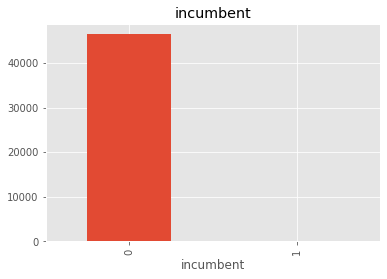

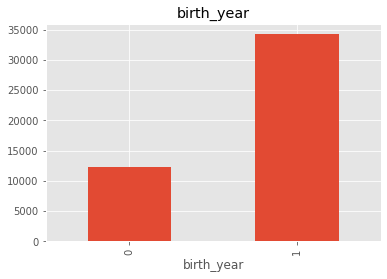

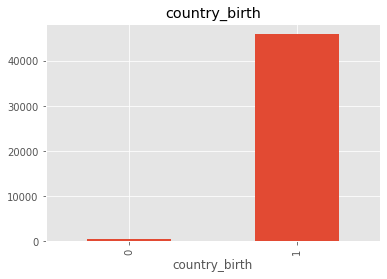

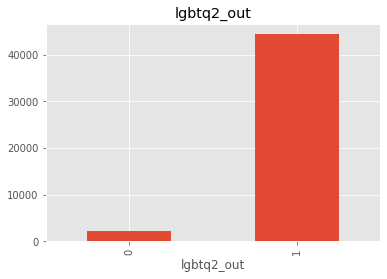

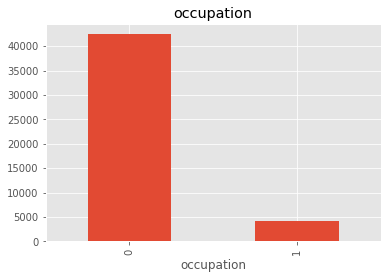

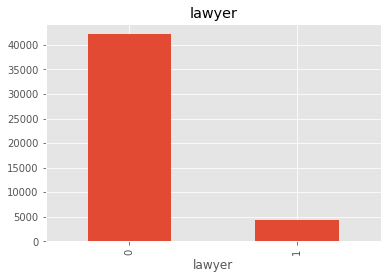

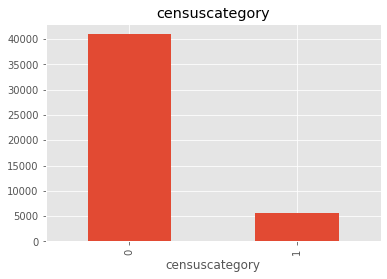

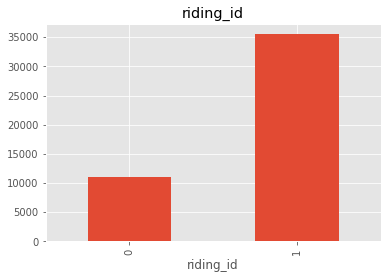

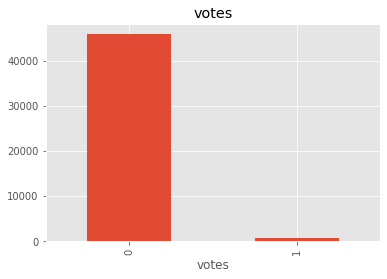

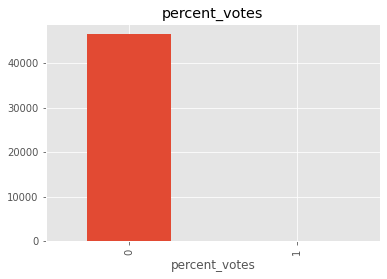

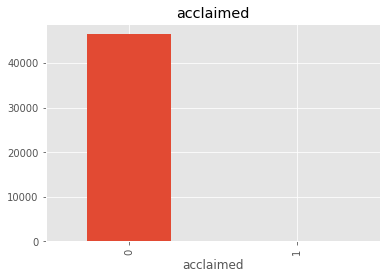

In [12]:
# we need to find relationship between missing columns with target column



# make the value of variable  1 if there is missing value else 0
for feature in features_with_na:
    df = data.copy()
    df[feature] = np.where(df[feature].isnull(),1,0)
    df.groupby(feature)['elected'].count().plot.bar()
    plt.title(feature)
    plt.show()



In [7]:
# Checking the unique values in all the features

for i in data.columns:
    
    print(data[i].nunique(),data[i].value_counts())
    print("--------------------------------------------------")

27658 30004    42
20709    20
19013    16
17089    16
24218    15
         ..
1678      1
1847      1
23462     1
30083     1
35991     1
Name: id, Length: 27658, dtype: int64
--------------------------------------------------
44 35    2228
43    2160
44    2010
42    1904
37    1875
36    1736
39    1692
38    1690
41    1679
40    1644
34    1616
32    1566
33    1479
31    1431
30    1324
29    1117
27    1053
26    1046
25    1021
28    1010
20    1010
22     957
18     952
21     936
24     869
23     867
19     720
14     697
17     603
15     586
16     572
8      545
6      534
7      532
3      526
10     523
13     519
9      516
12     513
4      500
11     481
5      474
1      413
2      400
Name: parliament, dtype: int64
--------------------------------------------------
147 2019    2174
1993    2156
2021    2010
2000    1826
2015    1792
        ... 
1941       3
1914       2
1886       2
1894       2
1916       1
Name: year, Length: 147, dtype: int64
-------------------

<Figure size 1440x1080 with 0 Axes>

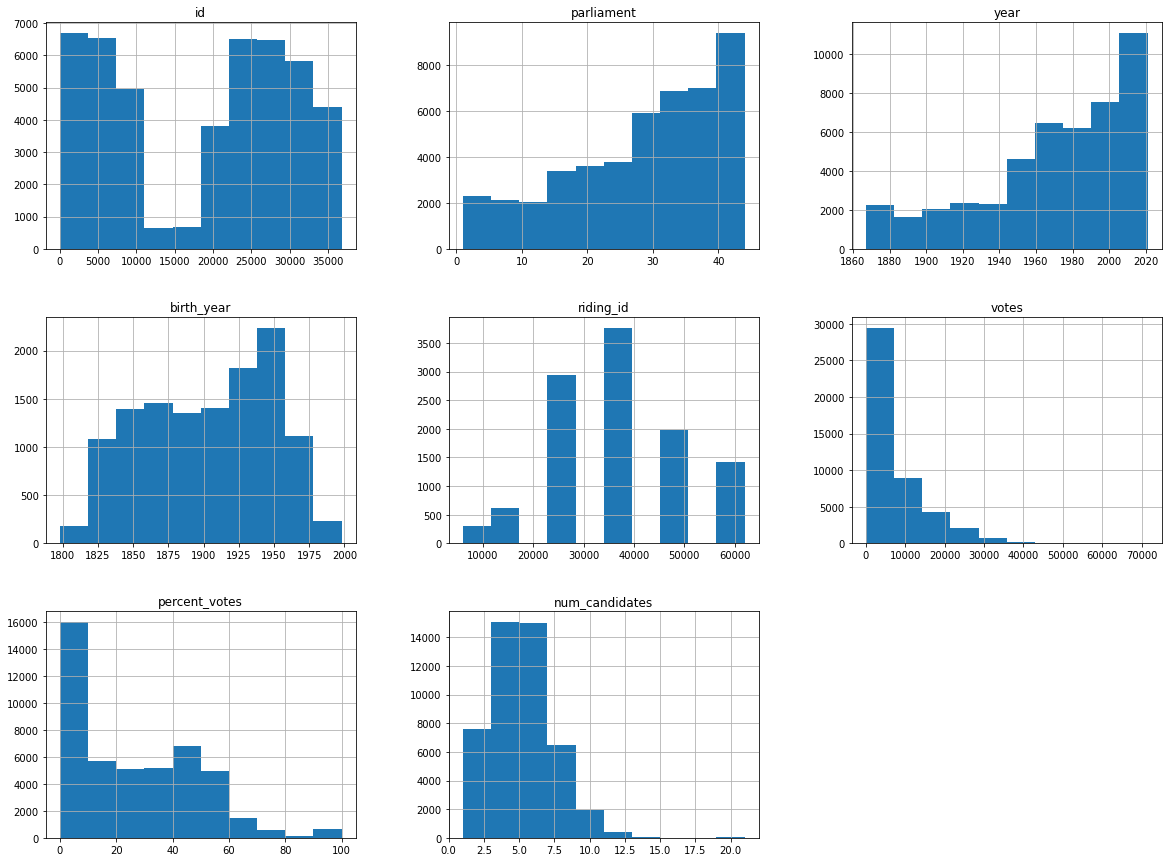

In [7]:
# plotting continuous variables

plt.figure(figsize=(20,15))
data.hist(figsize=(20,15))
pltcolumns)

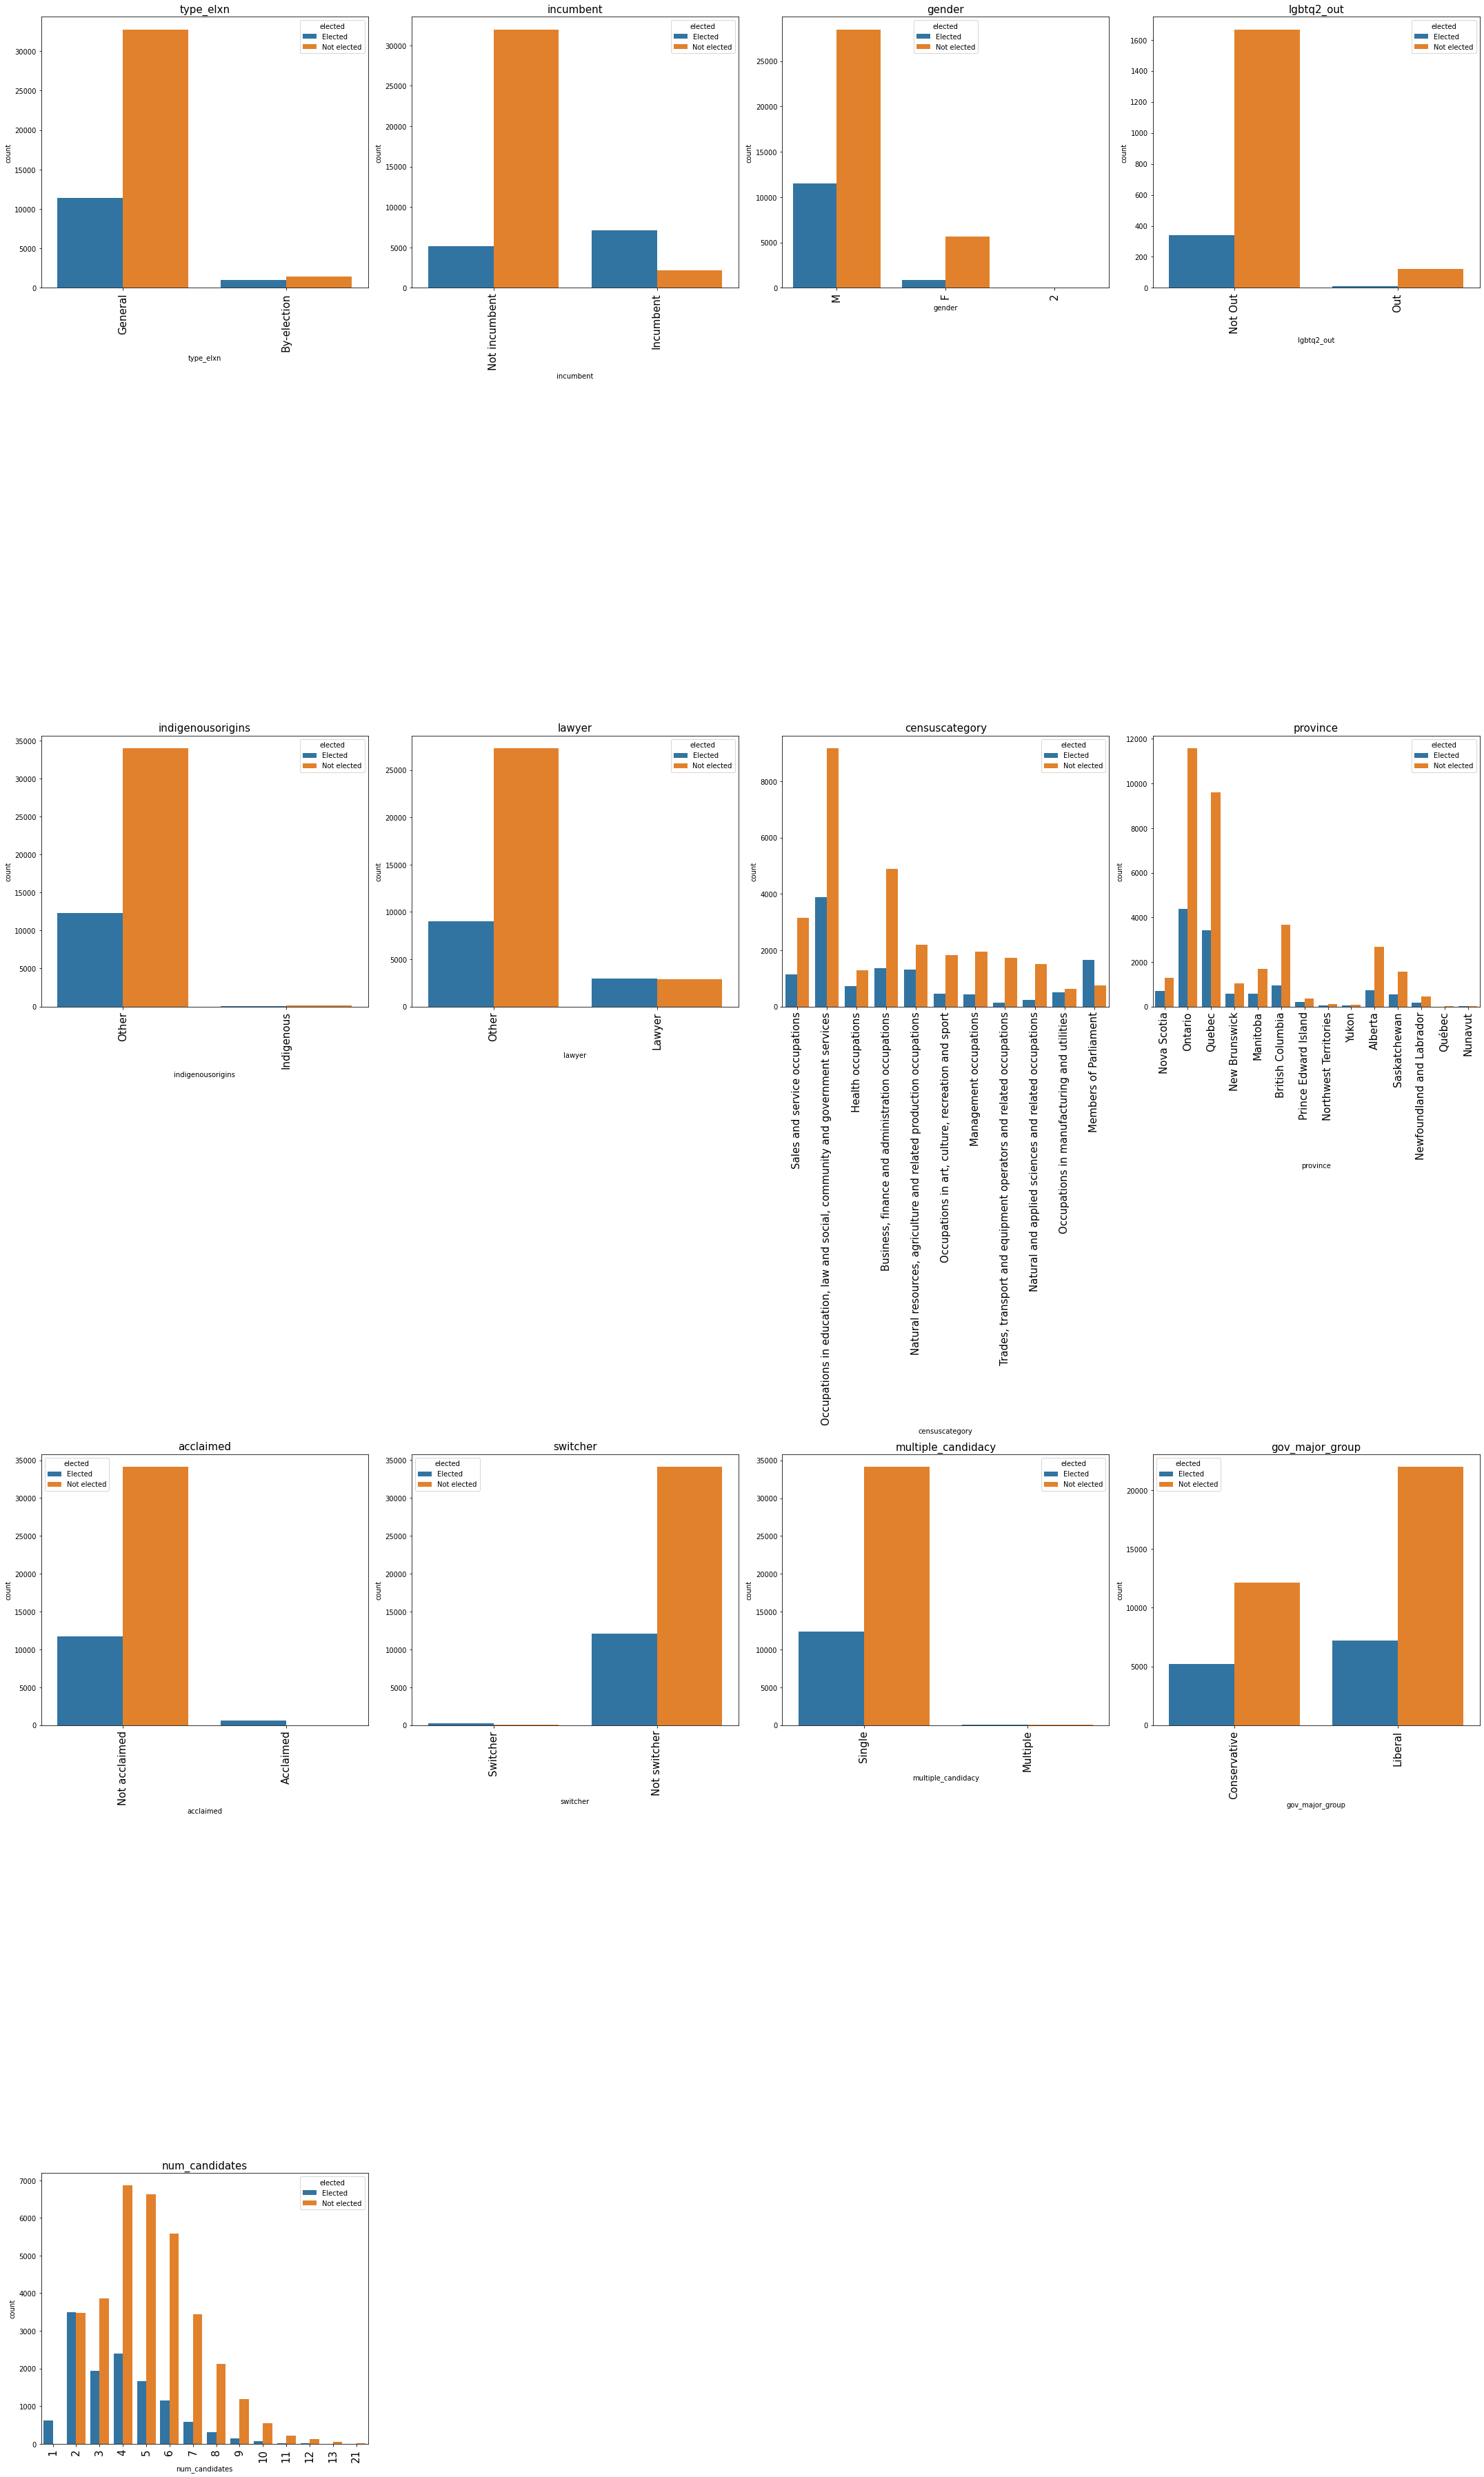

In [41]:
# Plotting various features against target column elected
col =[ 'type_elxn', 'incumbent', 'gender',
       'lgbtq2_out', 'indigenousorigins', 'lawyer',
       'censuscategory', 'province','acclaimed', 'switcher', 'multiple_candidacy',
         'gov_major_group', 'num_candidates']

plt.figure(figsize=(30,50))

for i in range(len(col)):
    plt.subplot(4,4,i+1)
    sns.countplot(data=data,x=data[col[i]],hue='elected')
    
    plt.title(col[i],fontsize=15)
    plt.xticks(fontsize=15,rotation=90)
plt.tight_layout()    
plt.show() 

Over the candidates, The persons got elected are very less. It is about 12386 out of 46526.Out of 46526 candidates, 39938 candidates were Male candidates and there is a few female candidates as well.The number of female candidates are about 6585. The intersting fact is there is 2 candidates from other gender catagory as well.

In [4]:
data.describe()

,id,parliament,year,birth_year,riding_id,votes,percent_votes,num_candidates
count,46526.000000,46526.000000,46526.000000,12276.000000,11039.000000,45835.000000,46453.000000,46526.000000
mean,18474.129240,28.644328,1970.283691,1902.300587,35464.123290,6974.764569,26.351366,4.771010
std,11673.186419,11.721868,40.938235,45.724343,13414.412753,7818.557103,22.668162,2.114113
min,1.000000,1.000000,1867.000000,1798.000000,6001.000000,0.000000,0.000000,1.000000
25%,6478.000000,21.000000,1949.000000,1864.000000,24048.000000,1094.000000,4.268053,3.000000
50%,22031.000000,32.000000,1980.000000,1908.000000,35052.000000,4058.000000,23.123610,5.000000
75%,28612.750000,38.000000,2004.000000,1942.000000,47006.000000,10371.000000,44.759899,6.000000
max,36769.000000,44.000000,2021.000000,1998.000000,62001.000000,71535.000000,100.000000,21.000000


In [3]:
# Added a new column age(the age of the candidate at the time of election) 
data['age'] = data['year'] - data['birth_year']


In [4]:
data.head()

,id,parliament,year,type_elxn,elected,candidate_name,edate,incumbent,gender,birth_year,...,switcher,multiple_candidacy,party_raw,party_minor_group,party_major_group,gov_party_raw,gov_minor_group,gov_major_group,num_candidates,age
0,26093,1,1867,General,Elected,"POWER,",1867-08-07,Not incumbent,M,1815.0,...,Switcher,Single,Anti-Confederate,Third_Party,Third_Party,Conservative,Conservative,Conservative,4,52.0
1,13011,1,1867,General,Elected,"JONES,",1867-08-07,Not incumbent,M,1824.0,...,Switcher,Single,Labour,Labour,Third_Party,Conservative,Conservative,Conservative,4,43.0
2,27974,1,1867,General,Not elected,"SHANNON, S.L.",1867-08-07,Not incumbent,M,NaN,...,Not switcher,Single,Unknown,Independent,Independent,Conservative,Conservative,Conservative,4,NaN
3,18040,1,1867,General,Elected,"KIRKPATRICK, Thomas",1867-08-07,Not incumbent,M,1805.0,...,Not switcher,Single,Conservative,Conservative,Conservative,Conservative,Conservative,Conservative,2,62.0
4,1798,1,1867,General,Elected,"BLANCHET, Hon. J.G.",1867-08-07,Not incumbent,M,1829.0,...,Not switcher,Single,Liberal-Conservative,Conservative,Conservative,Conservative,Conservative,Conservative,1,38.0


<AxesSubplot:xlabel='elected', ylabel='age'>

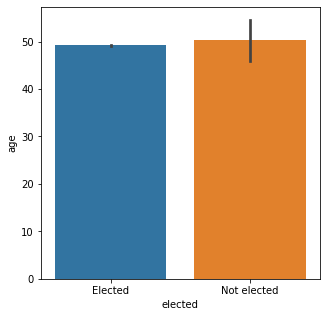

In [5]:
# Bivariate

plt.figure(figsize=(5,5))
sns.barplot(data=data,x='elected',y='age')

The average age of the candidates is between 40 and 50

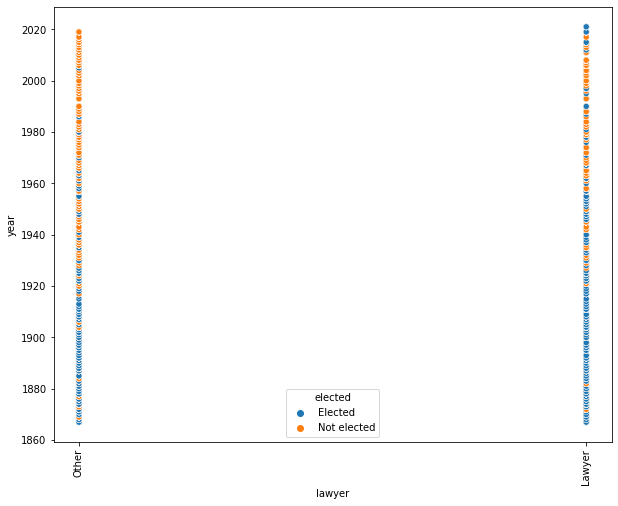

In [19]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data,x='lawyer',y='year',hue='elected')
plt.xticks(rotation=90)
plt.show()

The probability of winning a lawyer is high compared to other professions over all these years. 

In [47]:
data.occupation.value_counts(sort=True)

lawyer                          3940
farmer                          2624
teacher                         1536
parliamentarian                 1240
merchant                        1195
                                ... 
aircraft mechanic                  1
student, business partner          1
insurance loss controller          1
Member of Parliament, farmer       1
contractor, public servant         1
Name: occupation, Length: 7123, dtype: int64

In [50]:
data.occupation.nunique()

7123

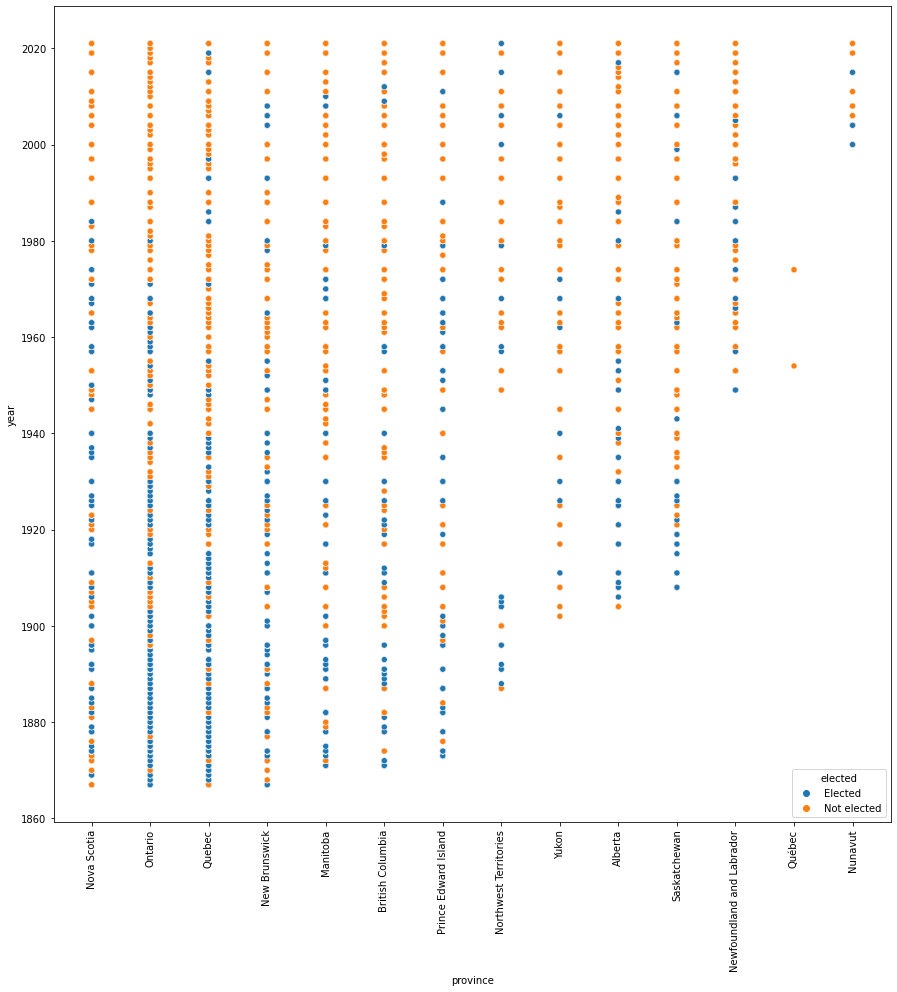

In [11]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=data,x='province',y='year',hue='elected')
plt.xticks(rotation=90)
plt.show()

In most provinces the leading parties are the same parties prominent at the federal level

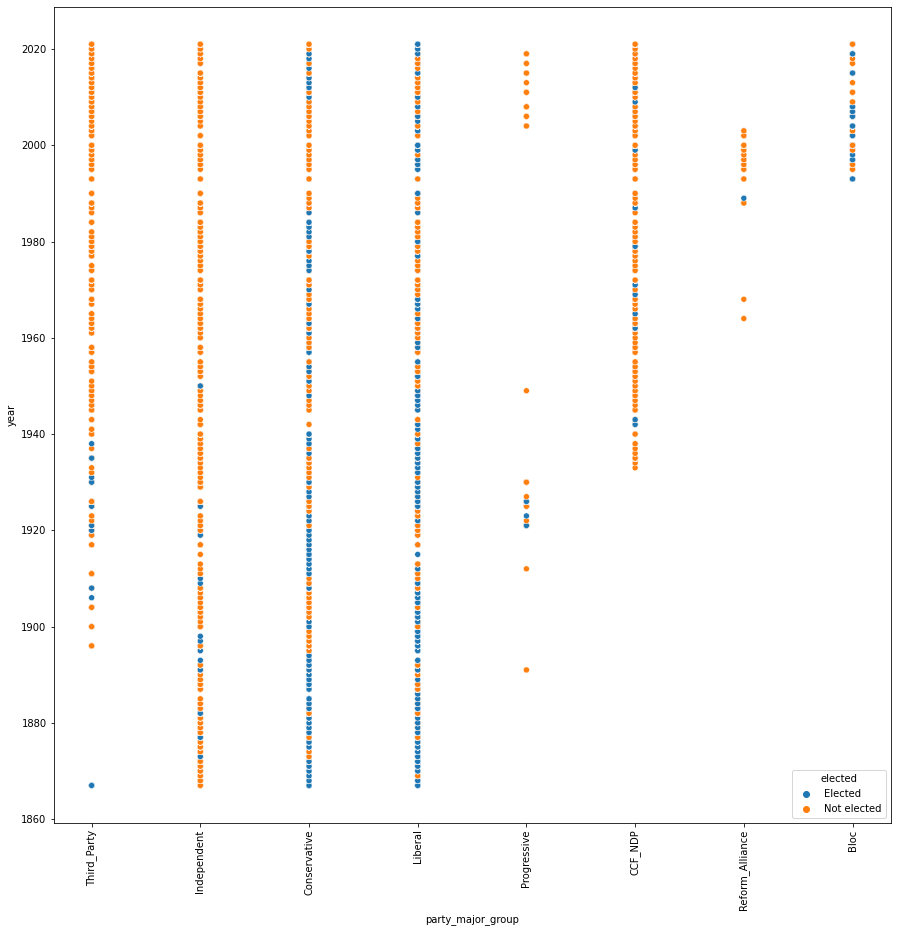

In [30]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=data,x='party_major_group',y='year',hue='elected')
plt.xticks(rotation=90)
plt.show()

 The Liberal Party of Canada is the longest-serving and oldest active federal political party in Canada.Liberal and conservative parties has maintained their winning probability throughout these years.Bloc is one of the newly added party but having high winning probability.  

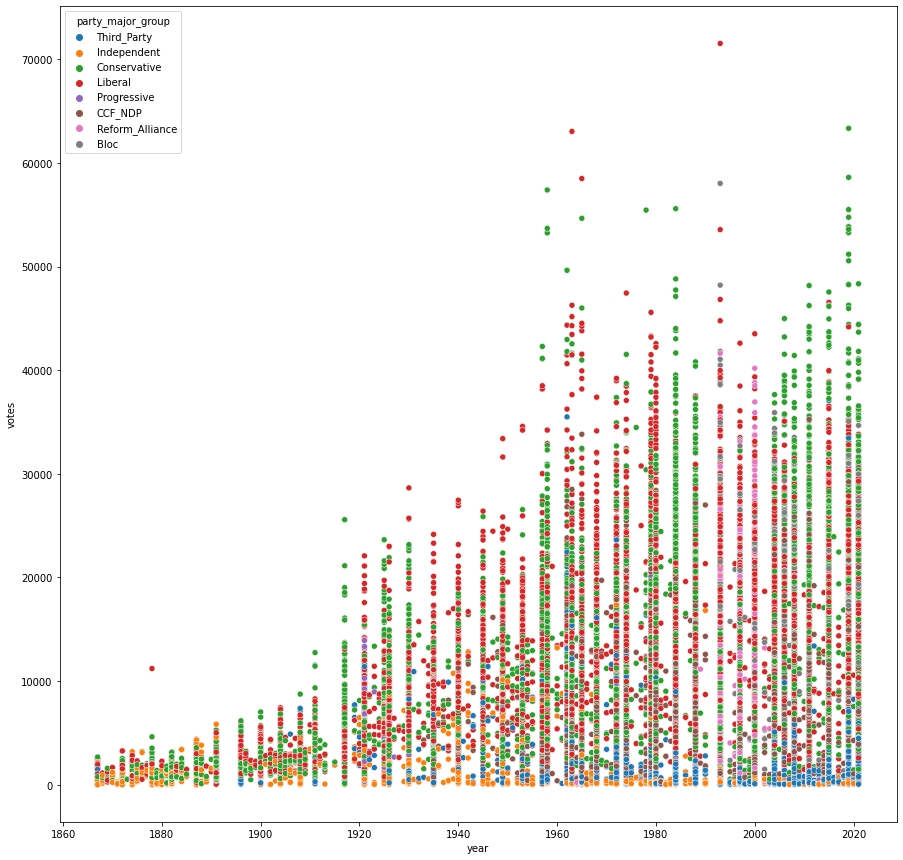

In [36]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=data,x='year',y='votes',hue='party_major_group')
plt.show()

The conservative and liberal parties got maximum votes over all these years

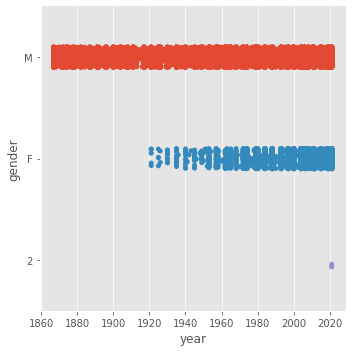

In [13]:
sns.catplot(data=data, x='year',y='gender')

#### 

At the earlier stages of canadian election, there was only male candidates but as time flies, after1920 there was an incerase in female candidates and in the current state there is equal number of male and female candidates are participating. And another major improvement is that there is candidates from other gender catagory(lgbtq) as well.